In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

In [38]:
# X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

# fig = plt.figure(0)
# plt.grid(True)
# plt.scatter(X[:,0],X[:,1])
# plt.show()

In [39]:
df = pd.read_csv('Mall_Customers.csv')
features = df.drop(['CustomerID','Genre','Age'], axis=1)
print(features)

     Annual_Income  Spending_Score
0               15              39
1               15              81
2               16               6
3               16              77
4               17              40
..             ...             ...
195            120              79
196            126              28
197            126              74
198            137              18
199            137              83

[200 rows x 2 columns]


In [40]:
cols = features.columns

ms = MinMaxScaler()
features = ms.fit_transform(features)

features = pd.DataFrame(features, columns=[cols])

In [41]:
k = 3
# clusters = {}
np.random.seed(23)
cluster = []
for idx in range(k):
    center = 2 + 2*(2*np.random.random((features.shape[1]))-1)
    cluster.append(center)
	# center = 2*(2*np.random.random((X.shape[1],))-1)
	# points = []
	# cluster = {
	# 	'center' : center,
	# 	'points' : []
	# }
	
	# clusters[idx] = cluster
print(cluster)


[array([2.06919154, 3.78785042]), array([3.06183904, 1.12958338]), array([0.88418145, 2.74488834])]


In [42]:
# Convert arrays to matrix
matrix = np.vstack(cluster)

In [43]:
# features.values
matrix

array([[2.06919154, 3.78785042],
       [3.06183904, 1.12958338],
       [0.88418145, 2.74488834]])

In [44]:
kmeans = KMeans(n_clusters=3, init=cluster, n_init=1)
kmeans.fit(features.values)

KMeans(init=[array([2.06919154, 3.78785042]), array([3.06183904, 1.12958338]),
             array([0.88418145, 2.74488834])],
       n_clusters=3, n_init=1)

In [45]:
# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Predict the cluster index for each sample
labels = kmeans.predict(features.values)

[[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00819672 0.05102041]
 [0.00819672 0.7755102 ]
 [0.01639344 0.39795918]
 [0.01639344 0.76530612]
 [0.02459016 0.05102041]
 [0.02459016 0.94897959]
 [0.03278689 0.02040816]
 [0.03278689 0.7244898 ]
 [0.03278689 0.13265306]
 [0.03278689 1.        ]
 [0.04098361 0.14285714]
 [0.04098361 0.7755102 ]
 [0.04098361 0.12244898]
 [0.04098361 0.79591837]
 [0.04918033 0.34693878]
 [0.04918033 0.66326531]
 [0.06557377 0.28571429]
 [0.06557377 0.98979592]
 [0.07377049 0.34693878]
 [0.07377049 0.73469388]
 [0.08196721 0.04081633]
 [0.08196721 0.73469388]
 [0.10655738 0.13265306]
 [0.10655738 0.82653061]
 [0.10655738 0.31632653]
 [0.10655738 0.6122449 ]
 [0.1147541  0.30612245]
 [0.1147541  0.87755102]
 [0.12295082 0.03061224]
 [0.12295082 0.73469388]
 [0.14754098 0.03061224]
 [0.14754098 0.92857143]
 [0.14754098 0.13265306]
 [0.14754098 0.81632653]
 [0.1557377  0.16326531]
 [0.1557377  0.73469388]
 [0.18032787 0.25510204]
 [0.18032787 0.75510204]


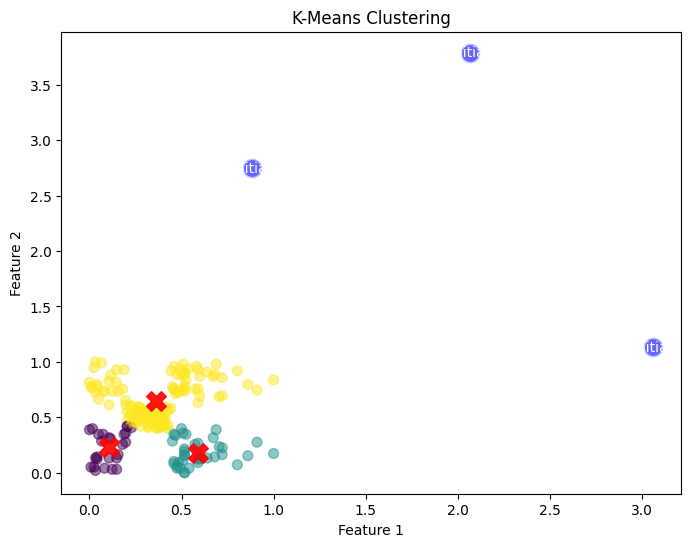

In [58]:
# Plot the clustered data
X = features.values
print(X)
initial_centroids = matrix
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.9, marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Highlight initial centroids
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='blue', s=200, alpha=0.6, marker='o', edgecolors='w', linewidths=2)
plt.text(initial_centroids[0, 0], initial_centroids[0, 1], 'Initial', color='white', ha='center', va='center')
plt.text(initial_centroids[1, 0], initial_centroids[1, 1], 'Initial', color='white', ha='center', va='center')
plt.text(initial_centroids[2, 0], initial_centroids[2, 1], 'Initial', color='white', ha='center', va='center')

# Show plot
plt.show()

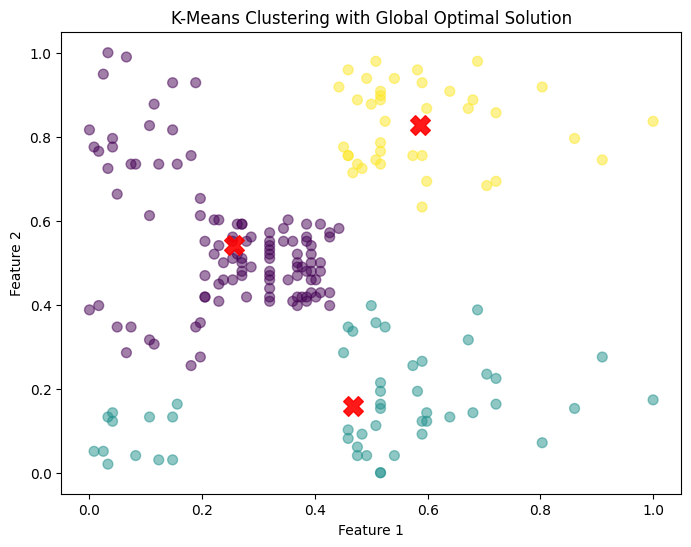

In [47]:
# Apply K-Means with default initialization (which uses K-Means++) for a better chance at finding a global optimum
kmeans_global_optimal = KMeans(n_clusters=3, random_state=0)
kmeans_global_optimal.fit(X)

# Get the cluster centroids for the global optimal solution
centroids_global_optimal = kmeans_global_optimal.cluster_centers_

# Predict the cluster index for each sample for the global optimal solution
labels_global_optimal = kmeans_global_optimal.predict(X)

# Plot the clustered data with the global optimal solution
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_global_optimal, s=50, cmap='viridis', alpha=0.5)
plt.scatter(centroids_global_optimal[:, 0], centroids_global_optimal[:, 1], c='red', s=200, alpha=0.9, marker='X')
plt.title('K-Means Clustering with Global Optimal Solution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show plot
plt.show()


In [48]:
# Print the labels for each data point
for i, label in enumerate(labels_global_optimal):
    print(f"Data point {i + 1}: Cluster {label}")

Data point 1: Cluster 0
Data point 2: Cluster 0
Data point 3: Cluster 1
Data point 4: Cluster 0
Data point 5: Cluster 0
Data point 6: Cluster 0
Data point 7: Cluster 1
Data point 8: Cluster 0
Data point 9: Cluster 1
Data point 10: Cluster 0
Data point 11: Cluster 1
Data point 12: Cluster 0
Data point 13: Cluster 1
Data point 14: Cluster 0
Data point 15: Cluster 1
Data point 16: Cluster 0
Data point 17: Cluster 0
Data point 18: Cluster 0
Data point 19: Cluster 0
Data point 20: Cluster 0
Data point 21: Cluster 0
Data point 22: Cluster 0
Data point 23: Cluster 1
Data point 24: Cluster 0
Data point 25: Cluster 1
Data point 26: Cluster 0
Data point 27: Cluster 0
Data point 28: Cluster 0
Data point 29: Cluster 0
Data point 30: Cluster 0
Data point 31: Cluster 1
Data point 32: Cluster 0
Data point 33: Cluster 1
Data point 34: Cluster 0
Data point 35: Cluster 1
Data point 36: Cluster 0
Data point 37: Cluster 1
Data point 38: Cluster 0
Data point 39: Cluster 0
Data point 40: Cluster 0
Data poin

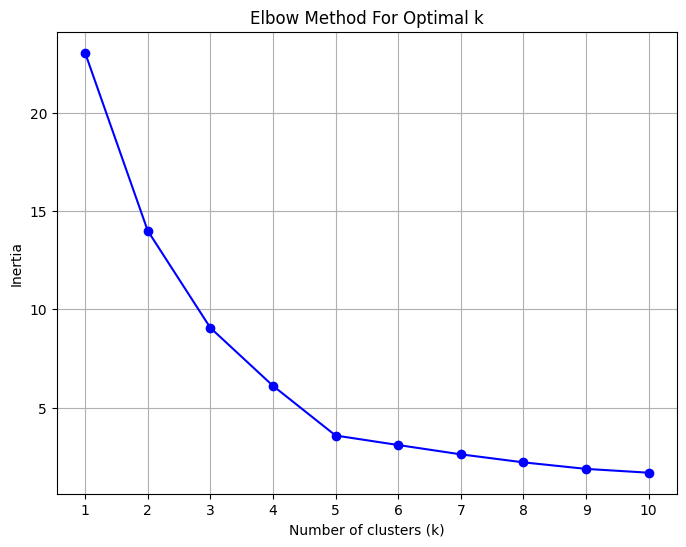

[4]


In [60]:
# Apply K-Means with multiple cluster numbers to demonstrate the elbow method
inertia_values = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, '-o', color='blue')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.predict([[100, 60]])
print(cluster_labels)

In [25]:
# plt.scatter(features.iloc[:,0],features.iloc[:,1])
# plt.grid(True)
# for i in clusters:
# 	center = clusters[i]['center']
# 	plt.scatter(center[0],center[1],marker = '*',c = 'red')
# plt.show()


In [26]:
# def distance(p1,p2):
# 	return np.sqrt(np.sum((p1-p2)**2))


In [27]:
# #Implementing E step 
# def assign_clusters(X, clusters):
# 	for idx in range(X.shape[0]):
# 		dist = []
		
# 		curr_x = X[idx]
		
# 		for i in range(k):
# 			dis = distance(curr_x,clusters[i]['center'])
# 			dist.append(dis)
# 		curr_cluster = np.argmin(dist)
# 		clusters[curr_cluster]['points'].append(curr_x)
# 	return clusters
		
# #Implementing the M-Step
# def update_clusters(X, clusters):
# 	for i in range(k):
# 		points = np.array(clusters[i]['points'])
# 		if points.shape[0] > 0:
# 			new_center = points.mean(axis =0)
# 			clusters[i]['center'] = new_center
			
# 			clusters[i]['points'] = []
# 	return clusters


In [33]:
# def pred_cluster(X, clusters):
# 	pred = []
# 	for i in range(X.shape[0]):
# 		dist = []
# 		for j in range(k):
# 			dist.append(distance(X[i],clusters[j]['center']))
# 		pred.append(np.argmin(dist))
# 	return pred


In [32]:
# clusters = assign_clusters(features,clusters)
# clusters = update_clusters(features,clusters)
# pred = pred_cluster(X,clusters)


In [31]:
# plt.scatter(X[:,0],X[:,1],c = pred)
# for i in clusters:
# 	center = clusters[i]['center']
# 	plt.scatter(center[0],center[1],marker = '^',c = 'red')
# plt.show()


In [29]:
# #Find optimum number of cluster
# sse = [] #SUM OF SQUARED ERROR
# for k in range(1,11):
# 	km = KMeans(n_clusters=k, random_state=2)
# 	km.fit(X)
# 	sse.append(km.inertia_)


In [30]:
# import seaborn as sns
# sns.set_style("whitegrid")
# g=sns.lineplot(x=range(1,11), y=sse)

# g.set(xlabel ="Number of cluster (k)", 
# 	ylabel = "Sum Squared Error", 
# 	title ='Elbow Method')

# plt.show()
